In [1]:
# Imports 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas
import numpy as np
import re

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

# Import SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# NEW
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Read in Data
train_df = pandas.read_csv('./data/train.csv')
print("Shape is:", train_df.shape)
print("Columns are:", train_df.columns)

Shape is: (15120, 56)
Columns are: Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', '

In [3]:
# Shuffle the available data
np.random.seed(0)
shuffle = np.random.permutation(np.arange(train_df.shape[0]))
train_df = train_df.iloc[shuffle]

# Assign desired number of obs to each partition
num_train = int(train_df.shape[0] * 0.6)
num_dev = int(train_df.shape[0] * 0.2)
# test data will be remaining after train and dev are separated

train_data, train_labels = train_df.iloc[:num_train,:-1], train_df.iloc[:num_train,-1:]
dev_data, dev_labels = train_df.iloc[num_train:num_train + num_dev,:-1], train_df.iloc[num_train:num_train + num_dev,-1:]
test_data, test_labels  = train_df.iloc[num_train + num_dev:,:-1], train_df.iloc[num_train + num_dev:,-1:]

print("Available data: ", train_df.shape)
print("Training partition: ", train_data.shape)
print("Dev partition: ", dev_data.shape)
print("Test partition: ", test_data.shape)

# Provide cover type list and labels for output labeling
cover_types = [1,2,3,4,5,6,7]
cover_labels = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]

Available data:  (15120, 56)
Training partition:  (9072, 55)
Dev partition:  (3024, 55)
Test partition:  (3024, 55)


## K Nearest Neighbors

k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9

Overall Maximum F1-Score: 0.81 at K = 3

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.68
2	Lodgepole Pine  	 0.61
3	Ponderosa Pine  	 0.74
4	Cottonwood/Willow	 0.91
5	Aspen           	 0.88
6	Douglas-fir     	 0.78
7	Krummholz       	 0.91


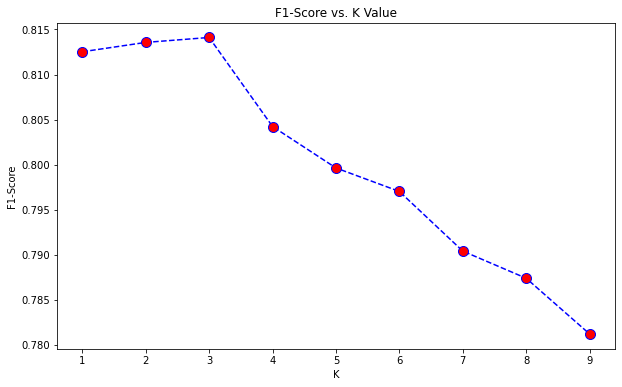

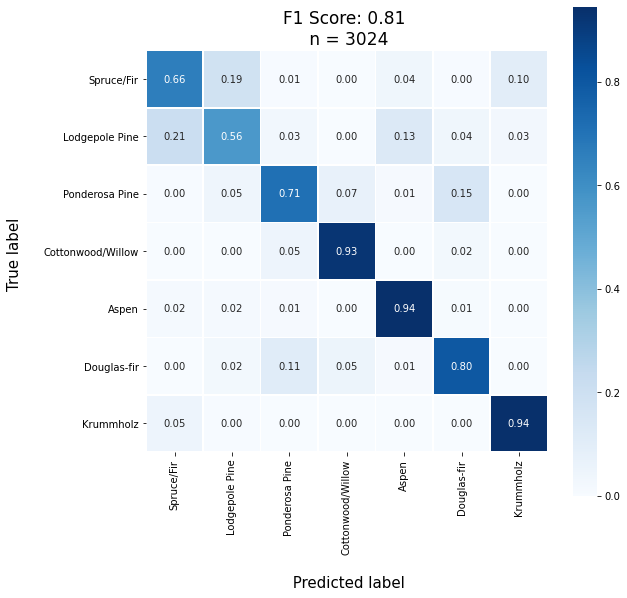

In [4]:

# #Scaling the distance hurts the performance
# scaler = preprocessing.MinMaxScaler()
# # fit scaler on data
# scaler.fit(train_data)
# # apply transform
# train_data_normalized = pandas.DataFrame(scaler.transform(train_data))
# dev_data_normalized  = pandas.DataFrame(scaler.transform(dev_data))



# Don't scale
# drop_columns = ['Hillshade_3pm']
drop_columns = ['Id'] #dropping the ID decreases the score... 

train_data_tmp = train_data.filter(
        regex=r'^(?!Soil_Type)').filter(
        regex=r'^(?!Cover_Type)').filter(
        regex=r'^(?!Wilderness_Area)').filter(
        regex=r'^(?!Hillshade)')

dev_data_tmp = dev_data.filter(
        regex=r'^(?!Soil_Type)').filter(
        regex=r'^(?!Cover_Type)').filter(
        regex=r'^(?!Wilderness_Area)').filter(
        regex=r'^(?!Hillshade)')

train_data_normalized = train_data_tmp.drop(drop_columns, axis=1)
dev_data_normalized = dev_data_tmp.drop(drop_columns, axis=1)

#Scaling decreases the F1 score to 0.74 from 0.83.
# from sklearn.preprocessing import scale
# train_data_normalized = scale(train_data_normalized)
# dev_data_normalized = scale(dev_data_normalized)


# train_data_normalized = train_data
# dev_data_normalized = dev_data


# print(train_data.shape, train_data_normalized.shape)
# print(dev_data.shape, dev_data_normalized.shape)


f1_score_kneigh = []
step = 1
k_range_i = range(1,10,step)
for i in k_range_i:
    print("k=", i,sep = "")
    
    #same score between distance and uniform weights
    neigh = KNeighborsClassifier(n_neighbors=i, weights = 'distance', p = 1)
#     neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train_data_normalized, train_labels.values.ravel())
    dev_data_pred = neigh.predict(dev_data_normalized)
    f1_score_kneigh.append(metrics.f1_score(dev_labels, dev_data_pred, average="weighted"))
#     print('F1 Score - KNN (k=', i, '): ',metrics.f1_score(test_labels, test_data_pred,average=None), sep="") 

plt.figure(figsize=(10,6))
plt.plot(k_range_i, f1_score_kneigh, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
overall_f1_score = round(max(f1_score_kneigh),2)
print("\nOverall Maximum F1-Score:", overall_f1_score,
      "at K =",k_range_i[f1_score_kneigh.index(max(f1_score_kneigh))])

# print("Overall F1 score: ", metrics.f1_score(dev_labels, dev_data_pred, average='weighted'))

# neigh = KNeighborsClassifier(n_neighbors=k_range_i[f1_score_kneigh.index(max(f1_score_kneigh))], weights = 'distance')
neigh = KNeighborsClassifier(n_neighbors=k_range_i[f1_score_kneigh.index(max(f1_score_kneigh))])

neigh.fit(train_data_normalized, train_labels.values.ravel())
dev_data_pred = neigh.predict(dev_data_normalized)
class_f1_scores =  metrics.f1_score(dev_labels, dev_data_pred, average=None)

print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

#Confusion Matrix
cm = metrics.confusion_matrix(dev_labels, dev_data_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = cover_labels, yticklabels = cover_labels, )
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(overall_f1_score, dev_data_pred.size)
plt.title(all_sample_title, size = 17);

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

neigh = KNeighborsClassifier(weights = 'distance')#, p = 1)

#set values of hyperparameters
params = {'n_neighbors': range(1,10,step),
         'p': range(1,10,1)}

#initiate gridsearch and fit model
clf = GridSearchCV(neigh, params, cv=None, scoring='accuracy')
clf.fit(train_data_normalized, train_labels)

# train_data_normalized = train_data_tmp.drop(drop_columns, axis=1)
# dev_data_normalized = dev_data_tmp.drop(drop_columns, axis=1)



#show results of gridsearch
print("The best value of K is", clf.best_params_["n_neighbors"])
print("The best value of p is", clf.best_params_["p"])

warnings.filterwarnings(action = "default")
pandas.DataFrame(clf.cv_results_).loc[:, ["params", "mean_test_score"]].sort_values(
    "mean_test_score", axis=0, ascending=False)


In [ ]:
dev_data.head()

### K-Nearest Neighbors with PCA

k=1
k=2
k=3
k=4
k=5
k=6
k=7
k=8
k=9

Overall Maximum F1-Score: 0.82 at K = 1

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.71
2	Lodgepole Pine  	 0.65
3	Ponderosa Pine  	 0.79
4	Cottonwood/Willow	 0.91
5	Aspen           	 0.89
6	Douglas-fir     	 0.82
7	Krummholz       	 0.93


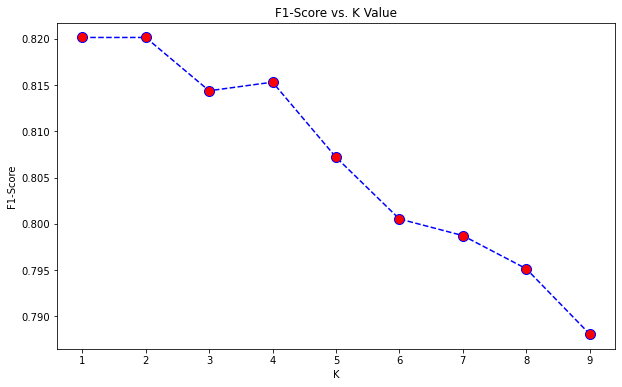

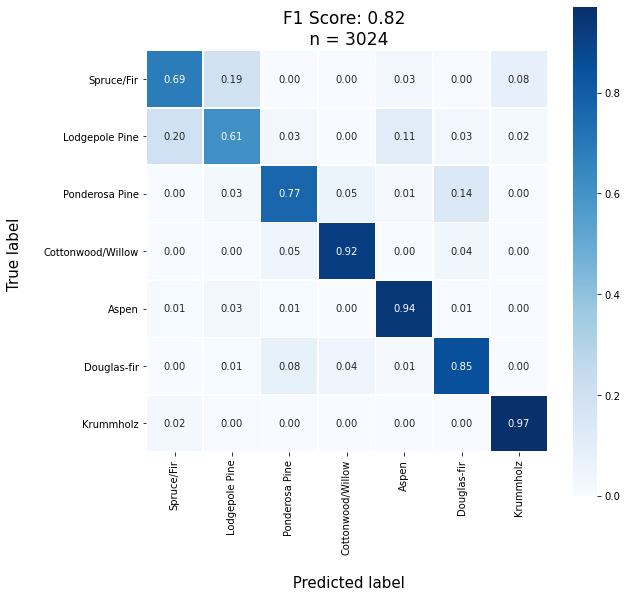

In [25]:
from sklearn.decomposition import PCA

# Create a n component pca
# n = 50#, F1 = 0.84
# n = 40, F1 = 0.84
# n = 30, F1 = 0.84
n = 10#, F1 = 0.64
# n = 2, F1 = 0.64

n = 10
drop_columns = ['Id']

train_data_continuous = train_data.filter(
        regex=r'^(?!Soil_Type)').filter(
        regex=r'^(?!Cover_Type)').filter(
        regex=r'^(?!Wilderness_Area)').drop(drop_columns, axis=1)

train_data_discrete = train_data.filter(
        regex=r'^(Soil_Type)').filter(
        regex=r'^(Cover_Type)').filter(
        regex=r'^(Wilderness_Area)')

dev_data_continuous = dev_data.filter(
        regex=r'^(?!Soil_Type)').filter(
        regex=r'^(?!Cover_Type)').filter(
        regex=r'^(?!Wilderness_Area)').drop(drop_columns, axis=1)

dev_data_discrete = dev_data.filter(
        regex=r'^(Soil_Type)').filter(
        regex=r'^(Cover_Type)').filter(
        regex=r'^(Wilderness_Area)')

pca = PCA(n_components=n).fit(train_data_continuous)
principalComponents = np.column_stack((pca.transform(train_data_continuous),train_data_discrete))
principalComponents_dev = np.column_stack((pca.transform(dev_data_continuous), dev_data_discrete))

# principalComponents_test = pandas.DataFrame(pca.transform(test_data))

# Add the labels and filter to safe ad poisonous
finalDf = np.column_stack((principalComponents, train_labels))

train_data_normalized = principalComponents
dev_data_normalized = principalComponents_dev

f1_score_kneigh = []
step = 1
k_range_i = range(1,10,step)
for i in k_range_i:
    print("k=", i,sep = "")
    
    #same score between distance and uniform weights
    neigh = KNeighborsClassifier(n_neighbors=i, weights = 'distance', p = 1)
#     neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(train_data_normalized, train_labels.values.ravel())
    dev_data_pred = neigh.predict(dev_data_normalized)
    f1_score_kneigh.append(metrics.f1_score(dev_labels, dev_data_pred, average="weighted"))
#     print('F1 Score - KNN (k=', i, '): ',metrics.f1_score(test_labels, test_data_pred,average=None), sep="") 

plt.figure(figsize=(10,6))
plt.plot(k_range_i, f1_score_kneigh, color='blue', linestyle='dashed', 
         marker='o', markerfacecolor='red', markersize=10)
plt.title('F1-Score vs. K Value')
plt.xlabel('K')
plt.ylabel('F1-Score')
overall_f1_score = round(max(f1_score_kneigh),2)
print("\nOverall Maximum F1-Score:", overall_f1_score,
      "at K =",k_range_i[f1_score_kneigh.index(max(f1_score_kneigh))])

# print("Overall F1 score: ", metrics.f1_score(dev_labels, dev_data_pred, average='weighted'))

# neigh = KNeighborsClassifier(n_neighbors=k_range_i[f1_score_kneigh.index(max(f1_score_kneigh))], weights = 'distance')
neigh = KNeighborsClassifier(n_neighbors=k_range_i[f1_score_kneigh.index(max(f1_score_kneigh))])

neigh.fit(train_data_normalized, train_labels.values.ravel())
dev_data_pred = neigh.predict(dev_data_normalized)
class_f1_scores =  metrics.f1_score(dev_labels, dev_data_pred, average=None)

print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

#Confusion Matrix
cm = metrics.confusion_matrix(dev_labels, dev_data_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = cover_labels, yticklabels = cover_labels, )
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(overall_f1_score, dev_data_pred.size)
plt.title(all_sample_title, size = 17);
    

## Naive Bayes

In [ ]:
from sklearn import preprocessing
# std_scale = preprocessing.StandardScaler().fit(train_data)
# train_data_normalized = pandas.DataFrame(std_scale.transform(train_data))
# dev_data_normalized  = pandas.DataFrame(std_scale.transform(dev_data))


# demonstrate data normalization with sklearn
# from sklearn.preprocessing import MinMaxScaler
# load data
# create scaler
scaler = preprocessing.MinMaxScaler()
# fit scaler on data
scaler.fit(train_data)
# apply transform
train_data_normalized = pandas.DataFrame(scaler.transform(train_data))
dev_data_normalized  = pandas.DataFrame(scaler.transform(dev_data))
# inverse transform
# inverse = scaler.inverse_transform(normalized)


# train_data_normalized = pandas.DataFrame(preprocessing.normalize(train_data))
# dev_data_normalized = pandas.DataFrame(preprocessing.normalize(dev_data))
train_data_normalized.describe().transpose().head()

/Users/ls_enel/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '



Overall Maximum F1-Score: 0.4 at alpha = 1.5

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.07
2	Lodgepole Pine  	 0.35
3	Ponderosa Pine  	 0.42
4	Cottonwood/Willow	 0.44
5	Aspen           	 0.50
6	Douglas-fir     	 0.47
7	Krummholz       	 0.55


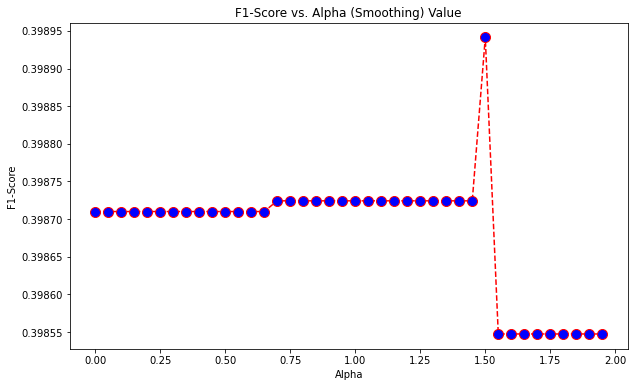

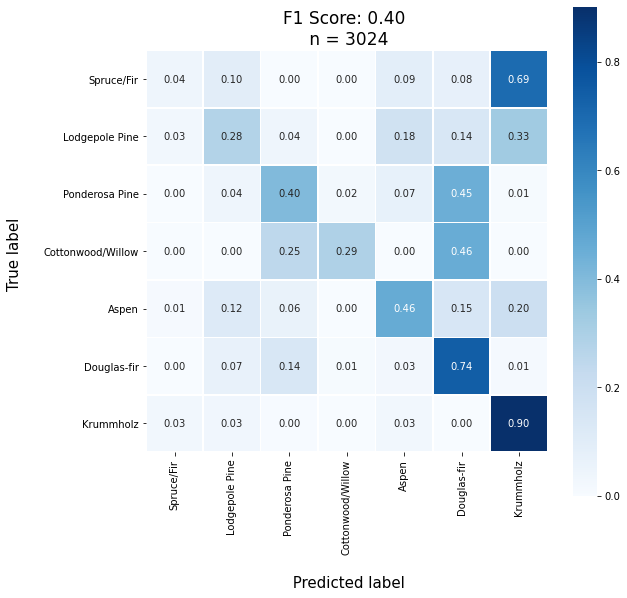

In [27]:
f1_score_NB = []
step = 0.05
alpha_range_i = np.arange(0.0, 2, step)
# step = 10
# alpha_range_i = np.arange(0.0, 100, step)
for i in alpha_range_i:
    NB = MultinomialNB(alpha=i)
    NB.fit(train_data_normalized, train_labels.values.ravel())
    dev_data_pred_NB = NB.predict(dev_data_normalized)
    f1_score_NB.append(metrics.f1_score(dev_labels, dev_data_pred_NB, average="weighted"))
    #play around with the average
#     f1_score_NB.append(metrics.f1_score(dev_labels, dev_data_pred, average=None))


plt.figure(figsize=(10,6))
plt.plot(alpha_range_i,f1_score_NB,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10)
plt.title('F1-Score vs. Alpha (Smoothing) Value')
plt.xlabel('Alpha')
plt.ylabel('F1-Score')
# print("Maximum F1-Score:-",max(f1_score_NB),
#       "at Alpha =",alpha_range_i[f1_score_NB.index(max(f1_score_NB))])

overall_f1_score = round(max(f1_score_NB),2)
print("\nOverall Maximum F1-Score:", overall_f1_score,
      "at alpha =",alpha_range_i[f1_score_NB.index(max(f1_score_NB))])

# print("Overall F1 score: ", metrics.f1_score(dev_labels, dev_data_pred, average='weighted'))
NB = MultinomialNB(alpha=alpha_range_i[f1_score_NB.index(max(f1_score_NB))])
NB.fit(train_data_normalized, train_labels.values.ravel())
dev_data_pred_NB = NB.predict(dev_data_normalized)
class_f1_scores =  metrics.f1_score(dev_labels, dev_data_pred_NB, average=None)

print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')
    
    
    
#Confusion Matrix
cm = metrics.confusion_matrix(dev_labels, dev_data_pred_NB)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = cover_labels, yticklabels = cover_labels, )
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(overall_f1_score, dev_data_pred_NB.size)
plt.title(all_sample_title, size = 17);

In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# neigh = KNeighborsClassifier(weights = 'distance')#, p = 1)
NB = MultinomialNB(alpha=i)

#set values of hyperparameters
params = {'alpha': ...,
         ...}

#initiate gridsearch and fit model
clf = GridSearchCV(neigh, params, cv=None, scoring='accuracy')
clf.fit(train_data_normalized, train_labels)

# train_data_normalized = train_data_tmp.drop(drop_columns, axis=1)
# dev_data_normalized = dev_data_tmp.drop(drop_columns, axis=1)



#show results of gridsearch
print("The best value of K is", clf.best_params_["n_neighbors"])
print("The best value of p is", clf.best_params_["p"])

warnings.filterwarnings(action = "default")
pandas.DataFrame(clf.cv_results_).loc[:, ["params", "mean_test_score"]].sort_values(
    "mean_test_score", axis=0, ascending=False)


In [ ]:
#Lucas to do
- PCA with non binary/categorical variables than add those back on
- 

### Naive Bayes with PCA

/Users/ls_enel/opt/anaconda3/lib/python3.8/site-packages/sklearn/naive_bayes.py:511: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '



Overall Maximum F1-Score: 0.4 at alpha = 1.5


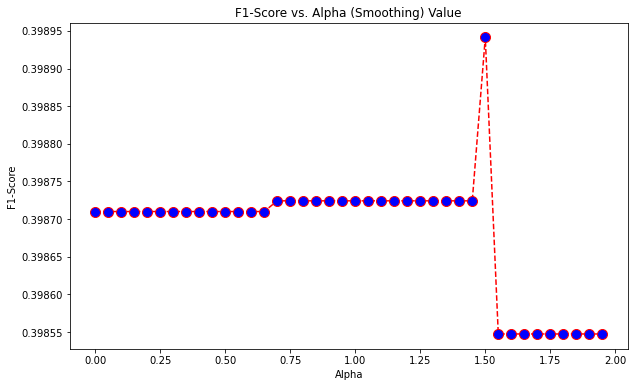

In [26]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Create a n component pca
# n = 50 #, F1 = 0.61
# n = 45 #, F1 = 0.61
# n = 40 #, F1 = 0.61
# n = 30 #, F1 = 0.59
n = 10
# n = 2 #, F1 = 0.21

# pca = PCA(n_components=n).fit(train_data)
# principalComponents = pandas.DataFrame(pca.transform(train_data))
# principalComponents_dev = pandas.DataFrame(pca.transform(dev_data))
# principalComponents_test = pandas.DataFrame(pca.transform(test_data))

drop_columns = ['Id']

train_data_continuous = train_data.filter(
        regex=r'^(?!Soil_Type)').filter(
        regex=r'^(?!Cover_Type)').filter(
        regex=r'^(?!Wilderness_Area)').drop(drop_columns, axis=1)

train_data_discrete = train_data.filter(
        regex=r'^(Soil_Type)').filter(
        regex=r'^(Cover_Type)').filter(
        regex=r'^(Wilderness_Area)')

dev_data_continuous = dev_data.filter(
        regex=r'^(?!Soil_Type)').filter(
        regex=r'^(?!Cover_Type)').filter(
        regex=r'^(?!Wilderness_Area)').drop(drop_columns, axis=1)

dev_data_discrete = dev_data.filter(
        regex=r'^(Soil_Type)').filter(
        regex=r'^(Cover_Type)').filter(
        regex=r'^(Wilderness_Area)')

pca = PCA(n_components=n).fit(train_data_continuous)
principalComponents = np.column_stack((pca.transform(train_data_continuous),train_data_discrete))
principalComponents_dev = np.column_stack((pca.transform(dev_data_continuous), dev_data_discrete))

# principalComponents_test = pandas.DataFrame(pca.transform(test_data))

# Add the labels and filter to safe ad poisonous
finalDf = np.column_stack((principalComponents, train_labels))

scaler = preprocessing.MinMaxScaler()
# fit scaler on data
scaler.fit(principalComponents)
# apply transform
train_data_normalized = pandas.DataFrame(scaler.transform(principalComponents))
dev_data_normalized  = pandas.DataFrame(scaler.transform(principalComponents_dev))


# train_data_normalized = principalComponents
# dev_data_normalized = principalComponents_dev


f1_score_NB = []
step = 0.05
alpha_range_i = np.arange(0.0, 2, step)
# step = 10
# alpha_range_i = np.arange(0.0, 100, step)
for i in alpha_range_i:
    NB = MultinomialNB(alpha=i)
    NB.fit(train_data_normalized, train_labels.values.ravel())
    dev_data_pred_NB = NB.predict(dev_data_normalized)
    f1_score_NB.append(metrics.f1_score(dev_labels, dev_data_pred_NB, average="weighted"))
    #play around with the average
#     f1_score_NB.append(metrics.f1_score(dev_labels, dev_data_pred, average=None))


plt.figure(figsize=(10,6))
plt.plot(alpha_range_i,f1_score_NB,color='red', linestyle='dashed', 
         marker='o',markerfacecolor='blue', markersize=10)
plt.title('F1-Score vs. Alpha (Smoothing) Value')
plt.xlabel('Alpha')
plt.ylabel('F1-Score')
# print("Maximum F1-Score:-",max(f1_score_NB),
#       "at Alpha =",alpha_range_i[f1_score_NB.index(max(f1_score_NB))])

overall_f1_score = round(max(f1_score_NB),2)
print("\nOverall Maximum F1-Score:", overall_f1_score,
      "at alpha =",alpha_range_i[f1_score_NB.index(max(f1_score_NB))])


## Logisitic Regression

In [ ]:
#Base Model
drop_columns = ['Id']
train_data_LR = train_data.drop(drop_columns, axis=1)
dev_data_LR = dev_data.drop(drop_columns, axis=1)

# #Have to scale data since baseline data contains negative values, which cannot be passed to MultinomialNB
# scaler = preprocessing.MinMaxScaler()
# # fit scaler on data
# scaler.fit(train_data_NB)
# # apply transform
# train_data_normalized_NB = pd.DataFrame(scaler.transform(train_data_NB), columns = train_data_NB.columns)
# dev_data_normalized_NB  = pd.DataFrame(scaler.transform(dev_data_NB), columns = dev_data_NB.columns)

LR = LogisticRegression()
LR.fit(train_data_LR, train_labels.values.ravel())
dev_data_pred_LR = LR.predict(dev_data_LR)
f1_score_LR = metrics.f1_score(dev_labels, dev_data_pred_LR, average="weighted")

print("\nBase LR Model - F1-Score:", round(f1_score_LR,2))

In [29]:
#Elevation Model

train_data_elevation = train_data.filter(
        regex=r'^(Elevation)')
dev_data_elevation = dev_data.filter(
        regex=r'^(Elevation)')

# #Have to scale data since baseline data contains negative values, which cannot be passed to MultinomialNB
# scaler = preprocessing.MinMaxScaler()
# # fit scaler on data
# scaler.fit(train_data_NB)
# # apply transform
# train_data_normalized_NB = pd.DataFrame(scaler.transform(train_data_NB), columns = train_data_NB.columns)
# dev_data_normalized_NB  = pd.DataFrame(scaler.transform(dev_data_NB), columns = dev_data_NB.columns)

LR = LogisticRegression()
LR.fit(train_data_elevation, train_labels.values.ravel())
dev_data_pred_LR_elevation = LR.predict(dev_data_elevation)
f1_score_LR = metrics.f1_score(dev_labels, dev_data_pred_LR_elevation, average="weighted")

print("\nBase LR Model - F1-Score:", round(f1_score_LR,2))




Base LR Model - F1-Score: 0.54


0.1, 5.1, 10.1, 15.1, 20.1, 25.1, 30.1, 35.1, 40.1, 45.1, 50.1, 55.1, 60.1, 65.1, 70.1, 75.1, 80.1, 85.1, 90.1, 95.1, 100.1, 105.1, 110.1, 115.1, 120.1, 125.1, 130.1, 135.1, 140.1, 145.1, 150.1, 155.1, 160.1, 165.1, 170.1, 175.1, 180.1, 185.1, 190.1, 195.1, 200.1, 205.1, 210.1, 215.1, 220.1, 225.1, 230.1, 235.1, 240.1, 245.1, 250.1, 255.1, 260.1, 265.1, 270.1, 275.1, 280.1, 285.1, 290.1, 295.1, 

<Figure size 864x576 with 0 Axes>

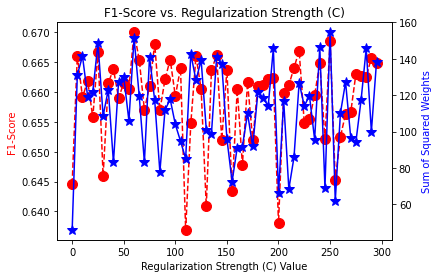



Overall Maximum F1-Score: 0.67 at regularization strength (C)  = 60.1

Class 	Class Label 		 F1 Score
1	Spruce/Fir      	 0.66
2	Lodgepole Pine  	 0.54
3	Ponderosa Pine  	 0.56
4	Cottonwood/Willow	 0.81
5	Aspen           	 0.70
6	Douglas-fir     	 0.58
7	Krummholz       	 0.88


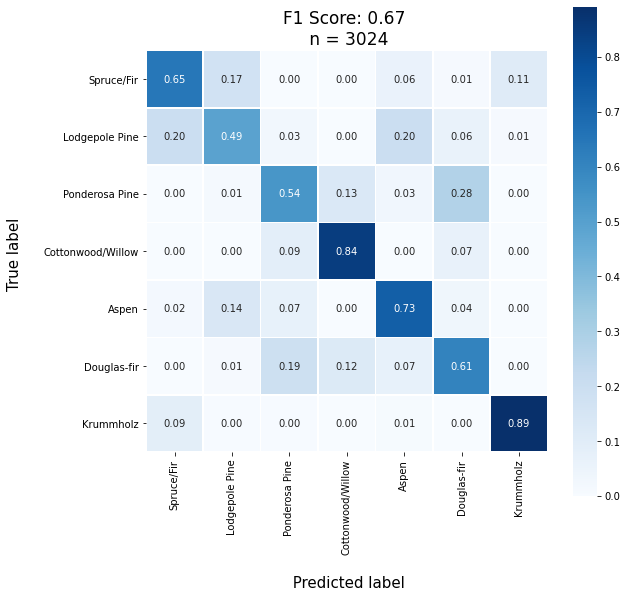

In [28]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
# fit scaler on data
scaler.fit(train_data)
# apply transform
train_data_normalized = pandas.DataFrame(scaler.transform(train_data))
dev_data_normalized  = pandas.DataFrame(scaler.transform(dev_data))

f1_score_LR = []
weights_LR = []
step = 5
# step = 50
c_range_i = np.arange(0.1, 300, step)
for i in c_range_i:
    print(round(i,3), end=", ")

##     Best Performance - 0.68 F1
    LogisRegL1 = LogisticRegression(C=i, solver="liblinear", multi_class="auto", penalty = "l1", tol=0.015)
    LogisRegL1.fit(train_data, train_labels.values.ravel())
    weight_sum = np.sum(LogisRegL1.coef_, axis = 0)
    idx = np.where(weight_sum != 0)[0]
    train_data2 = train_data.iloc[:, idx]
    dev_data2 = dev_data.iloc[:, idx]
    
    LogisRegL2 = LogisticRegression(C=i, solver="liblinear", multi_class="auto", penalty = "l2")#, tol=0.015)
    LogisRegL2.fit(train_data2, train_labels.values.ravel())   
    dev_data_pred_LR = LogisRegL2.predict(dev_data2)
    f1_score_LR.append(metrics.f1_score(dev_labels, dev_data_pred_LR, average="weighted"))
    ssq = np.sum(LogisRegL2.coef_**2)
    weights_LR.append(ssq)

##     Next Best - Very Close to First - 0.67 F1
#     LogisReg = LogisticRegression(C=i, solver="liblinear", multi_class="auto")
#     LogisReg.fit(train_data, train_labels.values.ravel())
#     dev_data_pred_LR = LogisReg.predict(dev_data)
#     f1_score_LR.append(metrics.f1_score(dev_labels, dev_data_pred_LR, average="weighted"))
#     ssq = np.sum(LogisReg.coef_**2)
#     weights_LR.append(ssq)



#     Worst Performance - 0.55 F1 (iterate with larger step size (c_range_i = np.arange(0.1, 300, step)))
#     LogisReg = LogisticRegression(C=i, solver="saga", multi_class="auto", penalty = 'elasticnet', l1_ratio = 0.5, max_iter = 1000)
#     LogisReg.fit(train_data, train_labels.values.ravel())
#     dev_data_pred_LR = LogisReg.predict(dev_data)
#     f1_score_LR.append(metrics.f1_score(dev_labels, dev_data_pred_LR, average="weighted"))
#     ssq = np.sum(LogisReg.coef_**2)
#     weights_LR.append(ssq)

    
    
# plt.figure(figsize=(10,6))
# plt.plot(c_range_i, f1_score_LR,color='red', linestyle='dashed', 
#          marker='o',markerfacecolor='blue', markersize=10)
# plt.plot(c_range_i, f1_score_LR,color='red', linestyle='dashed', 
#          marker='o',markerfacecolor='blue', markersize=10)
# plt.title('F1-Score vs. Regularization Strength (C) Value')
# plt.xlabel('C')
# plt.ylabel('F1-Score')


plt.figure(figsize=(12,8))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(c_range_i, f1_score_LR, color='red', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
ax2.plot(c_range_i, weights_LR, color='blue', linestyle='solid', 
         marker='*',markerfacecolor='blue', markersize=10)

plt.title('F1-Score vs. Regularization Strength (C)')
ax1.set_xlabel('Regularization Strength (C) Value')
ax1.set_ylabel('F1-Score', color='red')
ax2.set_ylabel('Sum of Squared Weights', color='blue')

plt.show()

print()
overall_f1_score = round(max(f1_score_LR),2)
print("\nOverall Maximum F1-Score:", overall_f1_score,
      "at regularization strength (C)  =",c_range_i[f1_score_LR.index(max(f1_score_LR))])

# LogisReg = LogisticRegression(C=c_range_i[f1_score_LR.index(max(f1_score_LR))], 
#                               solver="liblinear", multi_class="auto")

# LogisReg.fit(train_data, train_labels.values.ravel())
LogisRegL1 = LogisticRegression(C=c_range_i[f1_score_LR.index(max(f1_score_LR))],
                                solver="liblinear", multi_class="auto", 
                                penalty = "l1", tol=0.015)

LogisRegL1.fit(train_data_normalized, train_labels.values.ravel())
weight_sum = np.sum(LogisRegL1.coef_, axis = 0)
idx = np.where(weight_sum != 0)[0]
train_data2 = train_data_normalized.iloc[:, idx]
dev_data2 = dev_data_normalized.iloc[:, idx]

LogisRegL2 = LogisticRegression(C=i, solver="liblinear", multi_class="auto", penalty = "l2")#, tol=0.015)
LogisRegL2.fit(train_data2, train_labels.values.ravel())   
dev_data_pred_LR = LogisRegL2.predict(dev_data2)

# dev_data_pred_LR = LogisReg.predict(dev_data)
    
class_f1_scores =  metrics.f1_score(dev_labels, dev_data_pred_LR, average=None)

print("\nClass \tClass Label \t\t F1 Score")
for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
    print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')

    
    
    
#Confusion Matrix
cm = metrics.confusion_matrix(dev_labels, dev_data_pred_LR)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(9,9))
sns.heatmap(cm_percent, annot=True, fmt=".2f", linewidths=.5, square = True, cmap = 'Blues', xticklabels = cover_labels, yticklabels = cover_labels, )
plt.ylabel('True label \n', size = 15);
plt.xlabel('\n Predicted label', size = 15);
all_sample_title = 'F1 Score: {:.2f} \n n = {}'.format(overall_f1_score, dev_data_pred_LR.size)
plt.title(all_sample_title, size = 17);

In [ ]:
LogisRegL1 = LogisticRegression(C=c_range_i[f1_score_LR.index(max(f1_score_LR))],
                                solver="liblinear", multi_class="auto", 
                                penalty = "l2")#, tol=0.015)
LogisRegL1.fit(train_data_normalized, train_labels.values.ravel())


#7 x 52 features 
LogisReg_weights = LogisRegL1.coef_
print(pandas.DataFrame(LogisReg_weights).shape)

n = 55
top_n_weights_per_topic = []
top_n_indexloc_per_topic = []
for topic in abs(LogisReg_weights):
    top_n_tmp_loc = np.argsort(topic)[::-1][0:n]
    top_n_weights_per_topic.append(topic[top_n_tmp_loc])
    top_n_indexloc_per_topic.append(top_n_tmp_loc)

pandas.DataFrame(top_n_weights_per_topic)
pandas.DataFrame(top_n_indexloc_per_topic)
np.unique(np.concatenate(pandas.DataFrame(top_n_indexloc_per_topic).values), return_counts=True) #counts



In [ ]:
loc = [ 1,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20,
        23, 24, 25, 26, 27, 28, 35, 36, 39, 47, 48, 49, 50, 51, 52, 53, 54]
for i, value in enumerate(loc):
    loc[i] = value - 1

# print(loc)
train_data_normalized_v2 = train_data_normalized.iloc[:, loc]
dev_data_normalized_v2 = dev_data_normalized.iloc[:, loc]
# print(train_data_normalized_v2)
LogisRegL1_v2 = LogisticRegression(C=c_range_i[f1_score_LR.index(max(f1_score_LR))],
                                solver="liblinear", multi_class="auto", 
                                penalty = "l2")#, tol=0.015)
LogisRegL1_v2.fit(train_data_normalized_v2, train_labels.values.ravel())
dev_data_pred_LR_v2 = LogisRegL1_v2.predict(dev_data_normalized_v2)

metrics.f1_score(dev_labels, dev_data_pred_LR_v2, average="weighted")


In [ ]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# neigh = KNeighborsClassifier(weights = 'distance')#, p = 1)
LogisRegL1 = LogisticRegression(C=i, solver="liblinear", multi_class="auto", penalty = "l1", tol=0.015)




#set values of hyperparameters
params = {'alpha': ...,
         ...}

#initiate gridsearch and fit model
clf = GridSearchCV(neigh, params, cv=None, scoring='accuracy')
clf.fit(train_data_normalized, train_labels)

# train_data_normalized = train_data_tmp.drop(drop_columns, axis=1)
# dev_data_normalized = dev_data_tmp.drop(drop_columns, axis=1)



#show results of gridsearch
print("The best value of K is", clf.best_params_["n_neighbors"])
print("The best value of p is", clf.best_params_["p"])

warnings.filterwarnings(action = "default")
pandas.DataFrame(clf.cv_results_).loc[:, ["params", "mean_test_score"]].sort_values(
    "mean_test_score", axis=0, ascending=False)


## Logistic Regression with PCA

0.1, 10.1, 20.1, 30.1, 40.1, 50.1, 60.1, 70.1, 80.1, 90.1, 100.1, 110.1, 120.1, 130.1, 140.1, 150.1, 160.1, 170.1, 180.1, 190.1, 200.1, 210.1, 220.1, 230.1, 240.1, 250.1, 260.1, 270.1, 280.1, 290.1, 

<Figure size 864x576 with 0 Axes>

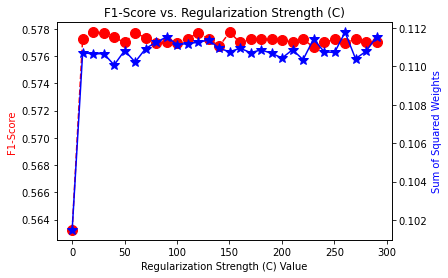



Overall Maximum F1-Score: 0.58 at regularization strength (C)  = 20.1


In [19]:
from sklearn.decomposition import PCA

# Create a n component pca
# n = 50, F1 = 0.66
# n = 45,# F1 = 0.66
# n = 40, F1 = 0.66
n = 10#, F1 = 0.63
# n = 2, F1 = 0.33

# pca = PCA(n_components=n).fit(train_data)
# principalComponents = pandas.DataFrame(pca.transform(train_data))
# principalComponents_dev = pandas.DataFrame(pca.transform(dev_data))
# principalComponents_test = pandas.DataFrame(pca.transform(test_data))
drop_columns = ['Id']

train_data_continuous = train_data.filter(
        regex=r'^(?!Soil_Type)').filter(
        regex=r'^(?!Cover_Type)').filter(
        regex=r'^(?!Wilderness_Area)')

train_data_discrete = train_data.filter(
        regex=r'^(Soil_Type)').filter(
        regex=r'^(Cover_Type)').filter(
        regex=r'^(Wilderness_Area)')

dev_data_continuous = dev_data.filter(
        regex=r'^(?!Soil_Type)').filter(
        regex=r'^(?!Cover_Type)').filter(
        regex=r'^(?!Wilderness_Area)')

dev_data_discrete = dev_data.filter(
        regex=r'^(Soil_Type)').filter(
        regex=r'^(Cover_Type)').filter(
        regex=r'^(Wilderness_Area)')

train_data_normalized = train_data_continuous.drop(drop_columns, axis=1)
dev_data_normalized = dev_data_continuous.drop(drop_columns, axis=1)


pca = PCA(n_components=n).fit(train_data_normalized)
principalComponents = pandas.DataFrame(np.column_stack((pca.transform(train_data_normalized),train_data_discrete)))
principalComponents_dev = pandas.DataFrame(np.column_stack((pca.transform(dev_data_normalized), dev_data_discrete)))
# Add the labels and filter to safe ad poisonous
finalDf = np.column_stack((principalComponents, train_labels))

scaler = preprocessing.MinMaxScaler()
# fit scaler on data
scaler.fit(principalComponents)
# apply transform
train_data_normalized = pandas.DataFrame(scaler.transform(principalComponents))
dev_data_normalized  = pandas.DataFrame(scaler.transform(principalComponents_dev))


f1_score_LR = []
weights_LR = []
step = 10
# step = 50
c_range_i = np.arange(0.1, 300, step)
for i in c_range_i:
    print(round(i,3), end=", ")

##     Best Performance - 0.68 F1
    LogisRegL1 = LogisticRegression(C=i, solver="liblinear", multi_class="auto", penalty = "l1", tol=0.015)
    LogisRegL1.fit(principalComponents, train_labels.values.ravel())
    weight_sum = np.sum(LogisRegL1.coef_, axis = 0)
    idx = np.where(weight_sum != 0)[0]
    train_data2 = principalComponents.iloc[:, idx]
    dev_data2 = principalComponents_dev.iloc[:, idx]
    
    LogisRegL2 = LogisticRegression(C=i, solver="liblinear", multi_class="auto", penalty = "l2")#, tol=0.015)
    LogisRegL2.fit(train_data2, train_labels.values.ravel())   
    dev_data_pred_LR = LogisRegL2.predict(dev_data2)
    f1_score_LR.append(metrics.f1_score(dev_labels, dev_data_pred_LR, average="weighted"))
    ssq = np.sum(LogisRegL2.coef_**2)
    weights_LR.append(ssq)

##     Next Best - Very Close to First - 0.67 F1
#     LogisReg = LogisticRegression(C=i, solver="liblinear", multi_class="auto")
#     LogisReg.fit(train_data, train_labels.values.ravel())
#     dev_data_pred_LR = LogisReg.predict(dev_data)
#     f1_score_LR.append(metrics.f1_score(dev_labels, dev_data_pred_LR, average="weighted"))
#     ssq = np.sum(LogisReg.coef_**2)
#     weights_LR.append(ssq)


plt.figure(figsize=(12,8))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(c_range_i, f1_score_LR, color='red', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
ax2.plot(c_range_i, weights_LR, color='blue', linestyle='solid', 
         marker='*',markerfacecolor='blue', markersize=10)

plt.title('F1-Score vs. Regularization Strength (C)')
ax1.set_xlabel('Regularization Strength (C) Value')
ax1.set_ylabel('F1-Score', color='red')
ax2.set_ylabel('Sum of Squared Weights', color='blue')

plt.show()

print()
overall_f1_score = round(max(f1_score_LR),2)
print("\nOverall Maximum F1-Score:", overall_f1_score,
      "at regularization strength (C)  =",c_range_i[f1_score_LR.index(max(f1_score_LR))])


    

In [ ]:
# LogisReg = LogisticRegression(C=c_range_i[f1_score_LR.index(max(f1_score_LR))], 
#                               solver="liblinear", multi_class="auto")

# # LogisReg.fit(train_data, train_labels.values.ravel())
# LogisRegL1 = LogisticRegression(C=c_range_i[f1_score_LR.index(max(f1_score_LR))],
#                                 solver="liblinear", multi_class="auto", 
#                                 penalty = "l1", tol=0.015)

# LogisRegL1.fit(train_data_normalized, train_labels.values.ravel())
# weight_sum = np.sum(LogisRegL1.coef_, axis = 0)
# idx = np.where(weight_sum != 0)[0]
# train_data2 = train_data_normalized.iloc[:, idx]
# dev_data2 = dev_data_normalized.iloc[:, idx]

# LogisRegL2 = LogisticRegression(C=i, solver="liblinear", multi_class="auto", penalty = "l2")#, tol=0.015)
# LogisRegL2.fit(train_data2, train_labels.values.ravel())   
# dev_data_pred_LR = LogisRegL2.predict(dev_data2)

# # dev_data_pred_LR = LogisReg.predict(dev_data)
    
# class_f1_scores =  metrics.f1_score(dev_labels, dev_data_pred_LR, average=None)

# print("\nClass \tClass Label \t\t F1 Score")
# for cover, label, score in zip(cover_types, cover_labels, class_f1_scores):
#     print(f'{cover:1.0f}\t{label:16s}\t{score:5.2f}')


In [ ]:
train_data.shape